# Depression Predictor

## Import packages

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten, Reshape, ZeroPadding2D

## Load data

In [171]:
data = pd.read_csv("b_depressed.csv")

## Take a quick look at the data structure

In [172]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [174]:
data.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


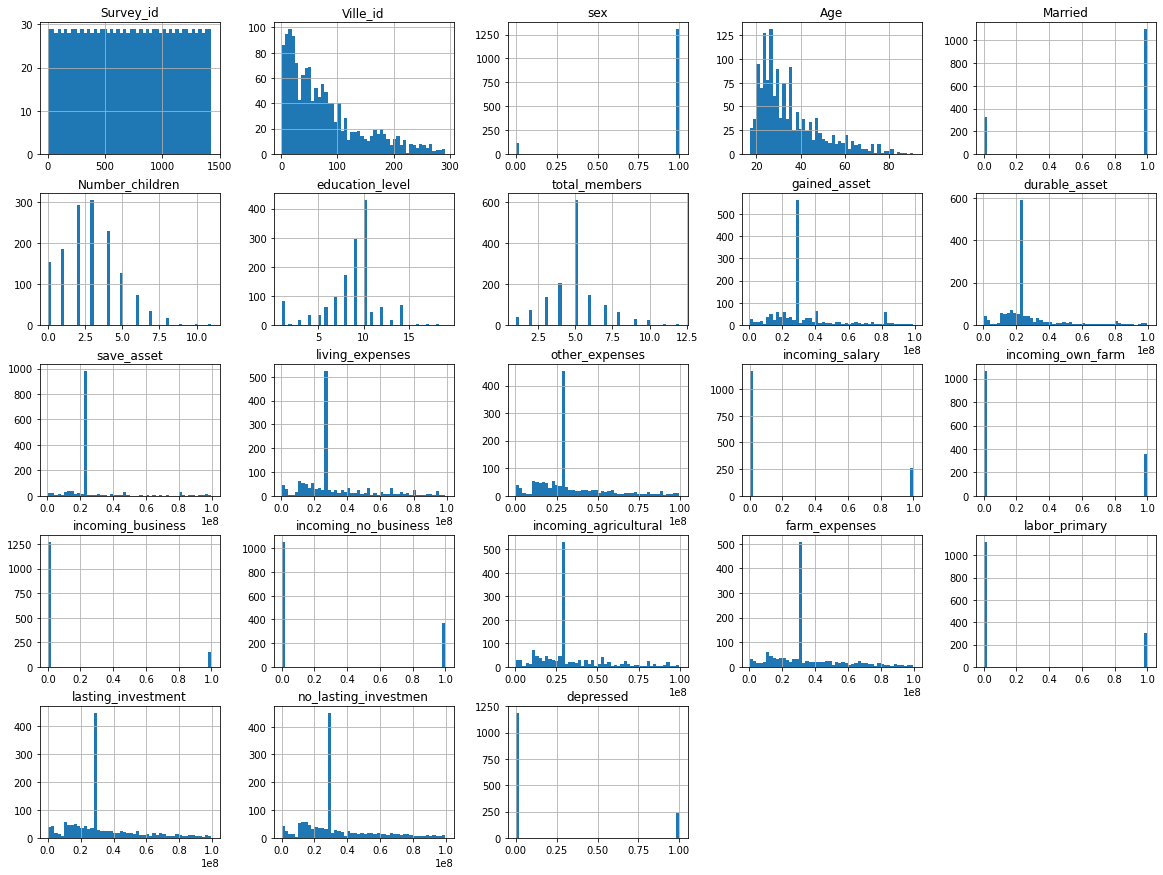

In [175]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## Set aside a test set

In [176]:
full_train_set, test_set = train_test_split(data, test_size=0.2, random_state=0, stratify=data['depressed'])
print(len(full_train_set), 'train istances +', len(test_set), 'test instances')

1143 train istances + 286 test instances


## Prepare the data for model training

In [177]:
attributes = [
    'sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members',
    'gained_asset','durable_asset','save_asset', 'living_expenses', 'other_expenses',
    'incoming_salary', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 
    'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen',
]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

pipeline = Pipeline([
    ('selector', DataFrameSelector(attributes)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

full_train_X = pipeline.fit_transform(full_train_set)
full_train_y = np.array(full_train_set['depressed'])

# Over sampling under-represented class (depressed) by SMOTE
# smote = SMOTE(random_state=0)
# full_train_X, full_train_y = smote.fit_resample(full_train_X, full_train_y)

## Train, select and fine-tune a model

In [178]:
# Choose and config a model
model_hyper_parameters = {
    'decision-tree': {
        'random_state': 0,
        'max_depth': 6,
        'min_samples_split': 10,
        'min_samples_leaf': 5,
    },
    'svm': {
        'random_state': 0,
        'kernel': 'poly',
        'degree': 10,
        'probability': True,
    },
    'knn': {
        'n_neighbors': list(range(1, 250, 5)),
    },
    'gradient-boosting': {
        'random_state': 0,
        'n_estimators': 25,
        'max_depth': 2,
        'min_samples_split': 10,
        'min_samples_leaf': 5,
        'subsample': 0.72,
        'max_features': 'sqrt',
    },
    'ada-boost': {
        'random_state': 0,
        'n_estimators': 8,
        'base_estimator': {
            'max_depth': 1,
            'min_samples_split': 10,
            'min_samples_leaf': 5,
            'max_features': 'sqrt',
        },
    },
    'neural-network': {
        'compiler': {
            'loss': 'binary_crossentropy',
            'optimizer': 'adam',
            'metrics': ['accuracy'],
        },
        'epochs': 150,
        'batch_size': 50,
        'verbose': 1,
    },
}
model_name = 'neural-network'

In [179]:
def construct_neural_network_model():
    # The famous LeNet-5 neural network with the following adaptation:
    # 1. proper reshaping and zero padding at the beginning to fit desired input shape
    # 2. sigmoid as the activation function at the end to reflect BINARY classification
    # Codes are adapted from https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086
    clf = Sequential()
    clf.add(Reshape((4, 5, 1), input_shape=(20,)))
    clf.add(ZeroPadding2D(padding=((14, 14), (14, 13))))
    clf.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    clf.add(AveragePooling2D())
    clf.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    clf.add(AveragePooling2D())
    clf.add(Flatten())
    clf.add(Dense(units=120, activation='relu'))
    clf.add(Dense(units=84, activation='relu'))
    clf.add(Dense(units=1, activation='sigmoid'))
    clf.compile(**model_hyper_parameters[model_name]['compiler'])
    clf.summary()
    return clf

def fit_and_validate_model(model_name):
    # Construct the model
    if model_name == 'decision-tree':
        clf = DecisionTreeClassifier(**model_hyper_parameters[model_name])
    elif model_name == 'svm':
        clf = SVC(**model_hyper_parameters[model_name])
    elif model_name == 'knn':
        clf = GridSearchCV(
            KNeighborsClassifier(),
            model_hyper_parameters[model_name],
            scoring='roc_auc',
            return_train_score=True,
        )
    elif model_name == 'gradient-boosting':
        clf = GradientBoostingClassifier(**model_hyper_parameters[model_name])
    elif model_name == 'ada-boost':
        base_estimator = DecisionTreeClassifier(**model_hyper_parameters[model_name]['base_estimator'])
        del model_hyper_parameters[model_name]['base_estimator']
        clf = AdaBoostClassifier(base_estimator=base_estimator, **model_hyper_parameters[model_name])
    elif model_name == 'neural-network':
        clf = construct_neural_network_model()
    else:
        raise ValueError('Invalid model specified!')
    
    # K-fold cross validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    train_aucs, validation_aucs = [], []
    for train_index, validation_index in skf.split(full_train_X, full_train_y):
        train_X, validation_X = full_train_X[train_index], full_train_X[validation_index]
        train_y, validation_y = full_train_y[train_index], full_train_y[validation_index]
        # Fit the model
        if model_name == 'neural-network':
            clf = construct_neural_network_model()  # Re-construct model for each fold to avoid model warm starting
            clf.fit(
                train_X, train_y,
                validation_data=([validation_X], [validation_y]),
                epochs=model_hyper_parameters[model_name]['epochs'],
                batch_size=model_hyper_parameters[model_name]['batch_size'],
            )
        else:
            clf.fit(train_X, train_y)
        # Calculate train AUC
        if model_name == 'neural-network':
            pred_proba = clf.predict(
                train_X,
                batch_size=model_hyper_parameters[model_name]['batch_size'],
                verbose=model_hyper_parameters[model_name]['verbose'],
            )
        else:
            pred_proba = clf.predict_proba(train_X)[:, 1]
        train_aucs.append(roc_auc_score(train_y, pred_proba))
        # Calculate validation AUC
        if model_name == 'neural-network':
            pred_proba = clf.predict(
                validation_X,
                batch_size=model_hyper_parameters[model_name]['batch_size'],
                verbose=model_hyper_parameters[model_name]['verbose'],
            )
        else:
            pred_proba = clf.predict_proba(validation_X)[:, 1]
        validation_aucs.append(roc_auc_score(validation_y, pred_proba))
    
    mean_train_auc = np.mean(train_aucs)
    mean_validation_auc = np.mean(validation_aucs)
    
    return clf, mean_train_auc, mean_validation_auc

# Fit and validate model
clf, mean_train_auc, mean_validation_auc = fit_and_validate_model(model_name)

# Print metrics and plot ROC on train set
print('Mean train AUC: {}'.format(mean_train_auc))

# Print metrics and plot ROC on validation set
print('Mean validation AUC: {}'.format(mean_validation_auc))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 4, 5, 1)           0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_10 (Averag (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)             

19/19 [==============================] - 0s 7ms/step - loss: 0.4293 - accuracy: 0.8337 - val_loss: 0.4859 - val_accuracy: 0.8341
Epoch 36/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4251 - accuracy: 0.8337 - val_loss: 0.4798 - val_accuracy: 0.8341
Epoch 37/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4213 - accuracy: 0.8337 - val_loss: 0.4831 - val_accuracy: 0.8341
Epoch 38/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4220 - accuracy: 0.8348 - val_loss: 0.4857 - val_accuracy: 0.8341
Epoch 39/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4201 - accuracy: 0.8348 - val_loss: 0.4941 - val_accuracy: 0.8341
Epoch 40/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4212 - accuracy: 0.8348 - val_loss: 0.5037 - val_accuracy: 0.8341
Epoch 41/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4196 - accuracy: 0.8370 - val_loss: 0.4926 - val_accuracy: 0.8341
Epoch 42/150
19/19 

Epoch 93/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2968 - accuracy: 0.8862 - val_loss: 0.6699 - val_accuracy: 0.8079
Epoch 94/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.8895 - val_loss: 0.6837 - val_accuracy: 0.7598
Epoch 95/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.8961 - val_loss: 0.6663 - val_accuracy: 0.7817
Epoch 96/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2781 - accuracy: 0.9048 - val_loss: 0.7368 - val_accuracy: 0.7511
Epoch 97/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2818 - accuracy: 0.8950 - val_loss: 0.6879 - val_accuracy: 0.7773
Epoch 98/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.8895 - val_loss: 0.6919 - val_accuracy: 0.7860
Epoch 99/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2796 - accuracy: 0.8950 - val_loss: 0.6952 - val_accuracy: 0.7991
Epoch 

5/5 [==============================] - 0s 2ms/step
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 4, 5, 1)           0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_14 (Averag (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
fl

19/19 [==============================] - 0s 6ms/step - loss: 0.3966 - accuracy: 0.8381 - val_loss: 0.4843 - val_accuracy: 0.8341
Epoch 46/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3899 - accuracy: 0.8414 - val_loss: 0.4860 - val_accuracy: 0.8297
Epoch 47/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3937 - accuracy: 0.8479 - val_loss: 0.4943 - val_accuracy: 0.8079
Epoch 48/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3913 - accuracy: 0.8381 - val_loss: 0.4825 - val_accuracy: 0.8297
Epoch 49/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.8435 - val_loss: 0.4928 - val_accuracy: 0.8166
Epoch 50/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3787 - accuracy: 0.8501 - val_loss: 0.4979 - val_accuracy: 0.8166
Epoch 51/150
19/19 [==============================] - 0s 7ms/step - loss: 0.3832 - accuracy: 0.8435 - val_loss: 0.4955 - val_accuracy: 0.8297
Epoch 52/150
19/19 

Epoch 103/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1854 - accuracy: 0.9322 - val_loss: 0.8088 - val_accuracy: 0.7598
Epoch 104/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1936 - accuracy: 0.9278 - val_loss: 0.7827 - val_accuracy: 0.7467
Epoch 105/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1854 - accuracy: 0.9387 - val_loss: 0.8130 - val_accuracy: 0.7729
Epoch 106/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1778 - accuracy: 0.9289 - val_loss: 0.7949 - val_accuracy: 0.7686
Epoch 107/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1778 - accuracy: 0.9322 - val_loss: 0.8396 - val_accuracy: 0.7729
Epoch 108/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1677 - accuracy: 0.9464 - val_loss: 0.8658 - val_accuracy: 0.7511
Epoch 109/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1815 - accuracy: 0.9289 - val_loss: 0.8740 - val_accuracy: 0.7249

Epoch 1/150
19/19 [==============================] - 0s 11ms/step - loss: 0.5896 - accuracy: 0.7943 - val_loss: 0.4623 - val_accuracy: 0.8341
Epoch 2/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4656 - accuracy: 0.8337 - val_loss: 0.4598 - val_accuracy: 0.8341
Epoch 3/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4583 - accuracy: 0.8337 - val_loss: 0.4495 - val_accuracy: 0.8341
Epoch 4/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4549 - accuracy: 0.8337 - val_loss: 0.4486 - val_accuracy: 0.8341
Epoch 5/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4545 - accuracy: 0.8337 - val_loss: 0.4494 - val_accuracy: 0.8341
Epoch 6/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4518 - accuracy: 0.8337 - val_loss: 0.4488 - val_accuracy: 0.8341
Epoch 7/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4520 - accuracy: 0.8337 - val_loss: 0.4483 - val_accuracy: 0.8341
Epoch 8/150


Epoch 59/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3727 - accuracy: 0.8468 - val_loss: 0.4990 - val_accuracy: 0.8122
Epoch 60/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3724 - accuracy: 0.8468 - val_loss: 0.5162 - val_accuracy: 0.7948
Epoch 61/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3658 - accuracy: 0.8501 - val_loss: 0.5332 - val_accuracy: 0.7729
Epoch 62/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3600 - accuracy: 0.8545 - val_loss: 0.5340 - val_accuracy: 0.7729
Epoch 63/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8534 - val_loss: 0.5341 - val_accuracy: 0.8079
Epoch 64/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3809 - accuracy: 0.8468 - val_loss: 0.5219 - val_accuracy: 0.8166
Epoch 65/150
19/19 [==============================] - 0s 6ms/step - loss: 0.3509 - accuracy: 0.8578 - val_loss: 0.5393 - val_accuracy: 0.7948
Epoch 

19/19 [==============================] - 0s 6ms/step - loss: 0.1817 - accuracy: 0.9398 - val_loss: 0.9299 - val_accuracy: 0.7555
Epoch 117/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1905 - accuracy: 0.9256 - val_loss: 0.8951 - val_accuracy: 0.7555
Epoch 118/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1847 - accuracy: 0.9300 - val_loss: 0.9915 - val_accuracy: 0.7336
Epoch 119/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1838 - accuracy: 0.9344 - val_loss: 0.9640 - val_accuracy: 0.7380
Epoch 120/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1843 - accuracy: 0.9322 - val_loss: 0.9958 - val_accuracy: 0.7424
Epoch 121/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1703 - accuracy: 0.9387 - val_loss: 1.0425 - val_accuracy: 0.7336
Epoch 122/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1633 - accuracy: 0.9420 - val_loss: 1.0319 - val_accuracy: 0.7162
Epoch 123/150

19/19 [==============================] - 0s 6ms/step - loss: 0.4457 - accuracy: 0.8339 - val_loss: 0.4528 - val_accuracy: 0.8333
Epoch 12/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4423 - accuracy: 0.8339 - val_loss: 0.4500 - val_accuracy: 0.8333
Epoch 13/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4425 - accuracy: 0.8339 - val_loss: 0.4507 - val_accuracy: 0.8333
Epoch 14/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4389 - accuracy: 0.8339 - val_loss: 0.4540 - val_accuracy: 0.8333
Epoch 15/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4393 - accuracy: 0.8339 - val_loss: 0.4505 - val_accuracy: 0.8333
Epoch 16/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4371 - accuracy: 0.8339 - val_loss: 0.4535 - val_accuracy: 0.8333
Epoch 17/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4342 - accuracy: 0.8339 - val_loss: 0.4510 - val_accuracy: 0.8333
Epoch 18/150
19/19 

Epoch 69/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2886 - accuracy: 0.8907 - val_loss: 0.6075 - val_accuracy: 0.7763
Epoch 70/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2726 - accuracy: 0.8995 - val_loss: 0.5977 - val_accuracy: 0.7807
Epoch 71/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2690 - accuracy: 0.9060 - val_loss: 0.6213 - val_accuracy: 0.7719
Epoch 72/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2742 - accuracy: 0.8907 - val_loss: 0.6109 - val_accuracy: 0.7632
Epoch 73/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.8787 - val_loss: 0.6246 - val_accuracy: 0.7632
Epoch 74/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2715 - accuracy: 0.8918 - val_loss: 0.6112 - val_accuracy: 0.7851
Epoch 75/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2577 - accuracy: 0.9027 - val_loss: 0.6293 - val_accuracy: 0.7632
Epoch 

19/19 [==============================] - 0s 6ms/step - loss: 0.1257 - accuracy: 0.9530 - val_loss: 1.3245 - val_accuracy: 0.7412
Epoch 127/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1238 - accuracy: 0.9519 - val_loss: 1.2909 - val_accuracy: 0.7500
Epoch 128/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1304 - accuracy: 0.9454 - val_loss: 1.3497 - val_accuracy: 0.7851
Epoch 129/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1414 - accuracy: 0.9399 - val_loss: 1.2811 - val_accuracy: 0.7500
Epoch 130/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1292 - accuracy: 0.9421 - val_loss: 1.3697 - val_accuracy: 0.7061
Epoch 131/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1381 - accuracy: 0.9443 - val_loss: 1.2626 - val_accuracy: 0.7851
Epoch 132/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1230 - accuracy: 0.9541 - val_loss: 1.2715 - val_accuracy: 0.7325
Epoch 133/150

19/19 [==============================] - 0s 7ms/step - loss: 0.4388 - accuracy: 0.8339 - val_loss: 0.4400 - val_accuracy: 0.8333
Epoch 22/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4383 - accuracy: 0.8339 - val_loss: 0.4345 - val_accuracy: 0.8333
Epoch 23/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4345 - accuracy: 0.8339 - val_loss: 0.4466 - val_accuracy: 0.8333
Epoch 24/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4335 - accuracy: 0.8339 - val_loss: 0.4343 - val_accuracy: 0.8333
Epoch 25/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4288 - accuracy: 0.8339 - val_loss: 0.4342 - val_accuracy: 0.8333
Epoch 26/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4263 - accuracy: 0.8339 - val_loss: 0.4373 - val_accuracy: 0.8333
Epoch 27/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4283 - accuracy: 0.8339 - val_loss: 0.4444 - val_accuracy: 0.8333
Epoch 28/150
19/19 

Epoch 79/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2419 - accuracy: 0.8984 - val_loss: 0.7066 - val_accuracy: 0.7588
Epoch 80/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2341 - accuracy: 0.9082 - val_loss: 0.7300 - val_accuracy: 0.7719
Epoch 81/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2278 - accuracy: 0.9148 - val_loss: 0.7497 - val_accuracy: 0.7807
Epoch 82/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2451 - accuracy: 0.8973 - val_loss: 0.7578 - val_accuracy: 0.7237
Epoch 83/150
19/19 [==============================] - 0s 7ms/step - loss: 0.2655 - accuracy: 0.8896 - val_loss: 0.7515 - val_accuracy: 0.7588
Epoch 84/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2338 - accuracy: 0.9027 - val_loss: 0.7718 - val_accuracy: 0.7939
Epoch 85/150
19/19 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.9126 - val_loss: 0.7825 - val_accuracy: 0.7500
Epoch 

19/19 [==============================] - 0s 7ms/step - loss: 0.1122 - accuracy: 0.9530 - val_loss: 1.5814 - val_accuracy: 0.7675
Epoch 137/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1118 - accuracy: 0.9552 - val_loss: 1.5057 - val_accuracy: 0.7500
Epoch 138/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1055 - accuracy: 0.9574 - val_loss: 1.5280 - val_accuracy: 0.7281
Epoch 139/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1105 - accuracy: 0.9541 - val_loss: 1.5720 - val_accuracy: 0.7588
Epoch 140/150
19/19 [==============================] - 0s 6ms/step - loss: 0.1181 - accuracy: 0.9486 - val_loss: 1.5518 - val_accuracy: 0.7412
Epoch 141/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1093 - accuracy: 0.9519 - val_loss: 1.5959 - val_accuracy: 0.7807
Epoch 142/150
19/19 [==============================] - 0s 7ms/step - loss: 0.1000 - accuracy: 0.9607 - val_loss: 1.5257 - val_accuracy: 0.7632
Epoch 143/150

In [180]:
# Print tree depth, number of leaves and plot decision tree
if model_name == 'decision-tree':
    print(clf.get_depth(), clf.get_n_leaves())
    tree.plot_tree(clf)
# Plot metrics on different k's
elif model_name == 'knn':
    # print('Best validation AUC: {}'.format(clf.best_score_))
    print('Best k: {}'.format(clf.best_params_))
    ks = [param['n_neighbors'] for param in clf.cv_results_['params']]
    train_scores = clf.cv_results_['mean_train_score']
    validation_scores = clf.cv_results_['mean_test_score']
    plt.plot(ks, train_scores, label='train')
    plt.plot(ks, validation_scores, label='validation')
    plt.legend(loc="upper right")
    plt.xlabel('k')
    plt.ylabel('Mean AUC from cross validation')

## Evaluate the final model on the test set

In [181]:
# Predict on test set
test_X = pipeline.transform(test_set)
test_y = np.array(test_set['depressed'])

if model_name == 'neural-network':
    pred_proba = clf.predict(
        test_X,
        batch_size=model_hyper_parameters[model_name]['batch_size'],
        verbose=model_hyper_parameters[model_name]['verbose'],
    )
    pred_y = np.argmax(pred_proba, axis=1)
else:
    pred_proba = clf.predict_proba(test_X)[:, 1]
    pred_y = clf.predict(test_X)

6/6 [==============================] - 0s 2ms/step


Accuracy: 0.8321678321678322
AUC of ROC: 0.5360644257703081


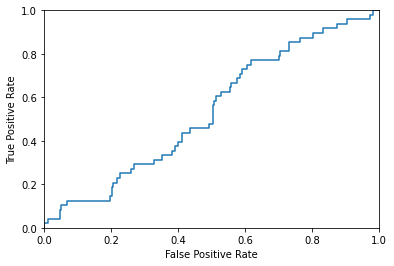

In [182]:
# Evaluate on test set
print('Accuracy: {}'.format(accuracy_score(test_y, pred_y)))
print('AUC of ROC: {}'.format(roc_auc_score(test_y, pred_proba)))
if model_name == 'neural-network':
    fpr , tpr , _ = roc_curve(test_y , pred_proba)
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
else:
    plot_roc_curve(clf, test_X, test_y)